In [1]:
import sys
sys.path.append("../../")
from src.models.naive import Naive
from src.utils.lagged_features.time_series_split_eval import (
    get_sorted_split_dirs,
    train_plot_preds_from_split_dir,
    calculate_mape,
    plot_mape_for_split_indices,
)

In [2]:
model = Naive()
split_dirs = get_sorted_split_dirs("../../data/lagged_features/time_series_split")

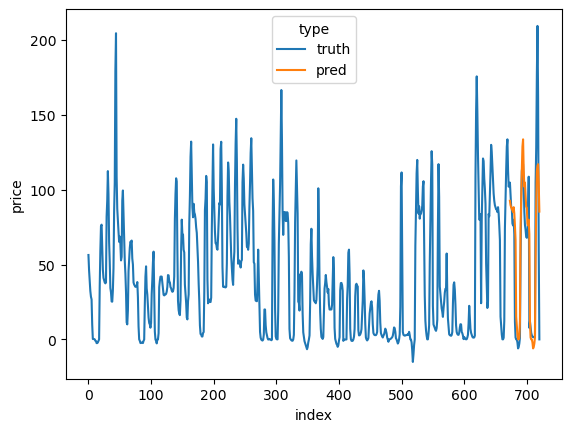

In [3]:
train_plot_preds_from_split_dir(model=model, split_dir=split_dirs[0])


In [6]:
mape = calculate_mape(model=model, split_dirs=split_dirs)
mape

[np.float64(1422386882311364.0),
 np.float64(8.553638054610099),
 np.float64(0.5436541738647076),
 np.float64(5618240535144708.0),
 np.float64(6.826203649628327),
 np.float64(7.283577306732727),
 np.float64(2.6216952182255064),
 np.float64(10.5001568531167),
 np.float64(0.41550940412947307),
 np.float64(0.5736381798867572),
 np.float64(4092646161373053.5),
 np.float64(0.47696891930527824),
 np.float64(2.251288025865506),
 np.float64(483198710019973.5),
 np.float64(0.6904200741216072),
 np.float64(0.6179958247640354),
 np.float64(61.425987368316434),
 np.float64(615491949073974.5),
 np.float64(0.5069922492762117),
 np.float64(7840954601236615.0),
 np.float64(34.852453783382046),
 np.float64(21.785670871708874),
 np.float64(0.4233860043629383),
 np.float64(0.41832676253531337)]

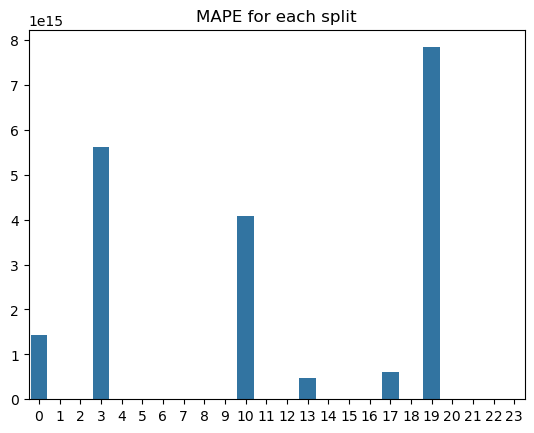

In [5]:
plot_mape_for_split_indices(split_dirs, mape)